## Correlation vs. Predictive Power Score

Correlation only captures linear relationships, but to fully understand which features might have some sort of dependency with others or the target, we can complement correlation values by looking at PPS. 

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

def plot_hist_sns(data, i, BINs):
    
    plt.figure(figsize = (9, 4))
    sns.distplot(data[i], kde = False, bins = BINs, hist_kws = {'edgecolor' : 'black', 'linewidth' : 1})
    plt.title('Distribution of ' + i)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show() 
    
def correlatedValue(x, r):
    
    r2 = r**2
    ve = 1-r2
    SD = np.sqrt(ve)
    e  = rand.normal(0, SD, len(x))
    y  = r*x + e
    
    return y

def scatter_sns(data, x, y):
    
    plt.figure(figsize = (9, 5))
    sns.scatterplot(data = data[data[y].between(-100, 100)], x = x, y = y, size = 3/4, 
                    edgecolor = 'k', linewidth = 1/3, color = 'blue', legend = False)
    plt.title('Relationship between ' + x + ' and ' + y)
    plt.show()  
    
def plot_corr(df, numerics):
    
    fig, ax = plt.subplots(figsize = (12, 5))
    sns.heatmap(df[numerics].corr(), ax = ax, cmap = 'coolwarm', center = 0, 
                annot = True, fmt = '.2g', annot_kws={'size' : 10})
    plt.title('Correlations\n')
    plt.show()
        
def plot_pps(pps_matrix):
    
    df = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    
    fig, ax = plt.subplots(figsize = (12, 5))
    sns.heatmap(df, ax = ax, cmap = 'coolwarm', center = 0, 
                annot = True, fmt = '.2g', annot_kws={'size' : 10})
    plt.title('PPS\n')
    plt.show()

### Generate 10000 random targets + features with different relationships to target

#### Target

In [8]:
seed = 56
rand = np.random.RandomState(seed) 

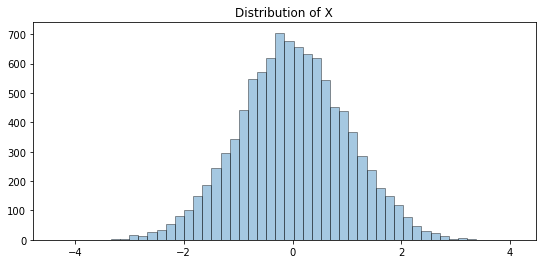

In [9]:
data = pd.DataFrame()
data['X'] = rand.normal(0, 1, 10000)

plot_hist_sns(data, 'X', 50)

#### Features

Correlated to target

In [10]:
data['CORR_0.8'] = correlatedValue(data['X'], 0.8)
data['CORR_-0.6'] = correlatedValue(data['X'], -0.6)

Polynomial relationship to target

In [11]:
data['POLY_RECI'] = np.power(data['X'], -1)
data['POLY_SQRT'] = np.power(data['X'], 1/2)
data['POLY_2'] = np.power(data['X'], 2)
data['POLY_3'] = np.power(data['X'], 3)

Exponential (power) relationship to target

In [12]:
data['POW_EXP'] = np.power(np.exp(1), data['X'])
data['POW_-EXP'] = np.power(np.exp(-1), data['X'])

Logarithmic relationship to target

In [13]:
data['LOG'] = np.log(data['X'])

Trigonometrics relationships

In [14]:
data['TRI_SIN'] = np.sin(data['X'])
data['TRI_COS'] = np.cos(data['X'])

### Explore relationships to target

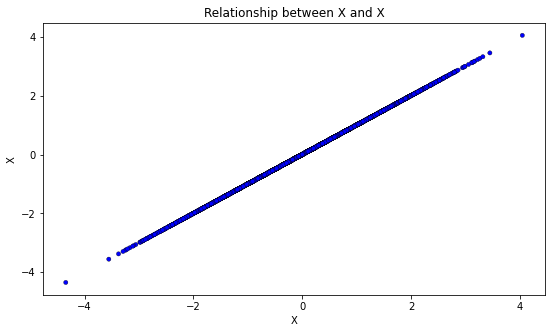

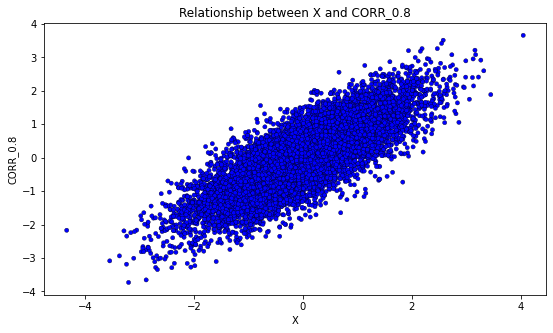

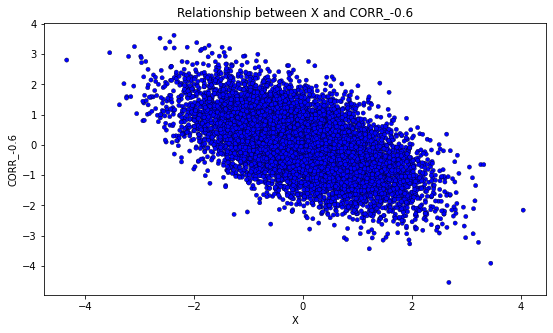

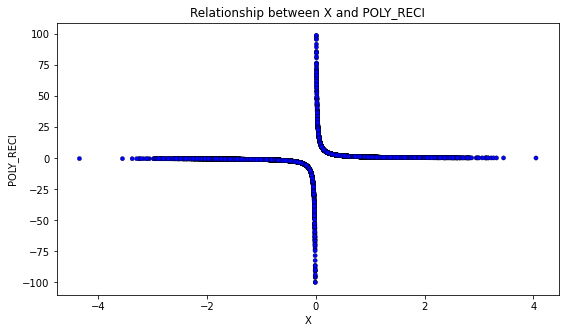

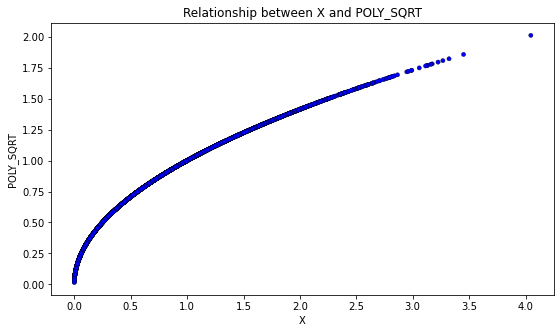

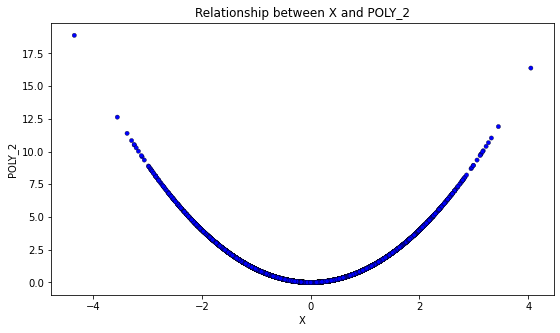

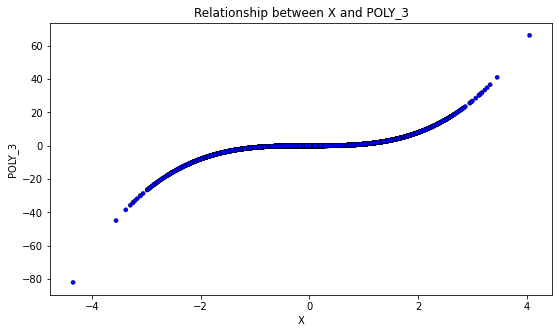

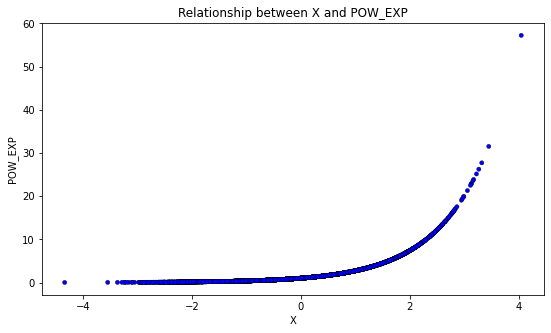

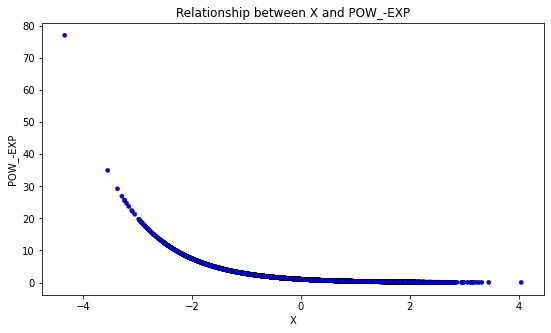

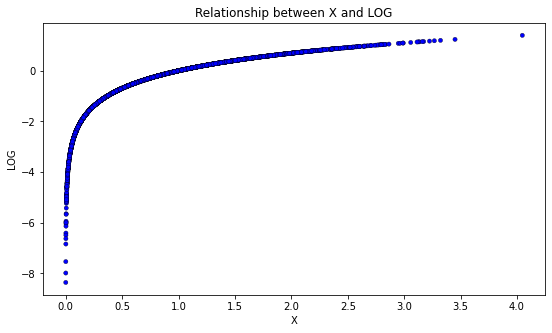

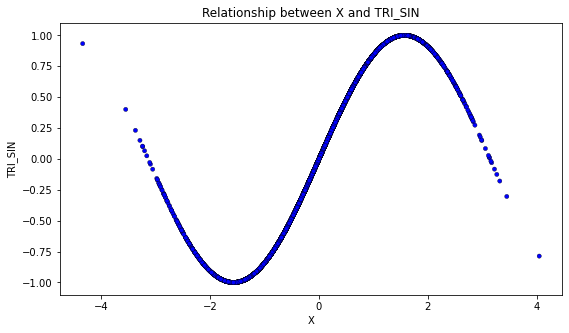

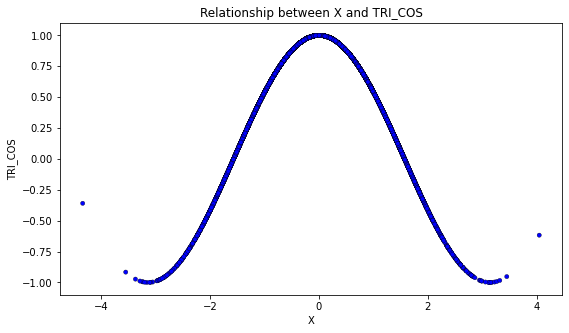

In [15]:
for i in data.columns:
    scatter_sns(data, 'X', i)

### Check correlation

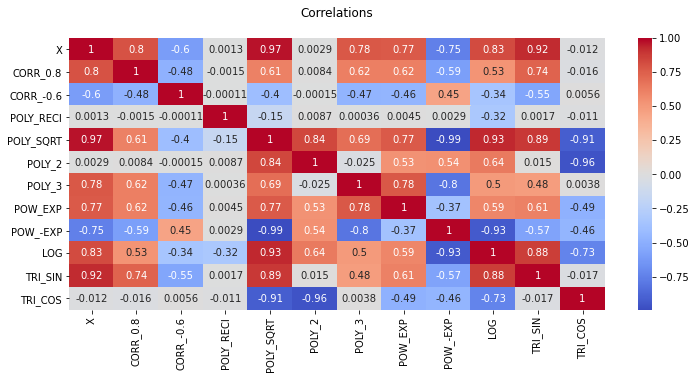

In [16]:
plot_corr(data, data.select_dtypes(exclude = 'O').columns)

### Check PPS

In [17]:
import ppscore as pps

In [18]:
pps_matrix = pps.matrix(data)

Correlations are symmetrical (r(x, y) = r(y,x)), however PPS values are not, as it is different when x is trying to predict y, or y is trying to capture x. Therefore we need to look at the 'correct direction'.

In [39]:
pps.score(data, 'POLY_2', 'X')

{'x': 'POLY_2',
 'y': 'X',
 'ppscore': 0.011060276170256511,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.8010808427072655,
 'model_score': 0.7922206673522214,
 'model': DecisionTreeRegressor()}

In [40]:
pps.score(data, 'X', 'POLY_2')

{'x': 'X',
 'y': 'POLY_2',
 'ppscore': 0.9932243251596354,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.8681583430096474,
 'model_score': 0.005882358642183042,
 'model': DecisionTreeRegressor()}

In [20]:
pps_matrix[pps_matrix['x'] == 'X']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,X,X,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,X,CORR_0.8,0.162459,regression,True,mean absolute error,0.810574,0.678889,DecisionTreeRegressor()
2,X,CORR_-0.6,0.000000,regression,True,mean absolute error,0.800998,0.905345,DecisionTreeRegressor()
3,X,POLY_RECI,0.901413,regression,True,mean absolute error,6.841691,0.674503,DecisionTreeRegressor()
4,X,POLY_SQRT,0.999021,regression,True,mean absolute error,0.290860,0.000285,DecisionTreeRegressor()
5,X,POLY_2,0.993224,regression,True,mean absolute error,0.868158,0.005882,DecisionTreeRegressor()
6,X,POLY_3,0.983914,regression,True,mean absolute error,1.627068,0.026173,DecisionTreeRegressor()
7,X,POW_EXP,0.991018,regression,True,mean absolute error,1.128906,0.010140,DecisionTreeRegressor()
8,X,POW_-EXP,0.987693,regression,True,mean absolute error,1.147685,0.014125,DecisionTreeRegressor()
9,X,LOG,0.998226,regression,True,mean absolute error,0.823682,0.001462,DecisionTreeRegressor()


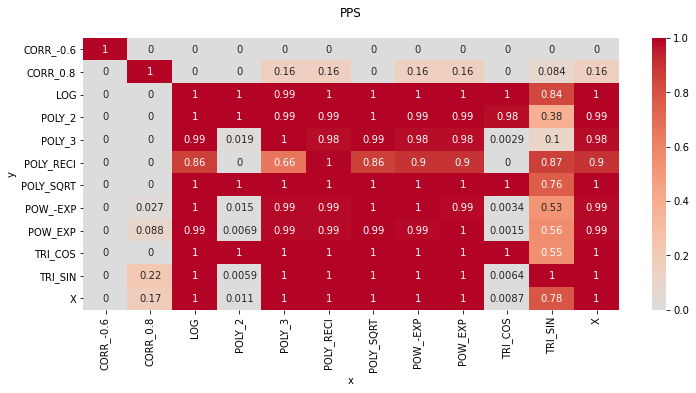

In [26]:
plot_pps(pps_matrix)

X has a strong predictive power score against almost all possible targets, except the two correlation cases (with random Gaussian noise)

#### Compare correlations with X vs X's predictive power

In [41]:
correl_X = data.corr()['X'].reset_index().rename(columns = {'X' : 'correlation', 'index' : 'y'})
pps_X = pps_matrix[pps_matrix['x'] == 'X'][['y', 'ppscore']]

correl_X.merge(pps_X).style.background_gradient('Greens')

,y,correlation,ppscore
0,X,1.000000,1.000000
1,CORR_0.8,0.800554,0.162459
2,CORR_-0.6,-0.597919,0.000000
3,POLY_RECI,0.001344,0.901413
4,POLY_SQRT,0.969764,0.999021
5,POLY_2,0.002928,0.993224
6,POLY_3,0.776595,0.983914
7,POW_EXP,0.774101,0.991018
8,POW_-EXP,-0.747384,0.987693
9,LOG,0.828189,0.998226


Check predictive scores manually with a simple Decision tree regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [69]:
X = data['X'].values.reshape(-1, 1)

for col in data.columns[1:].tolist():
    
    dt = DecisionTreeRegressor(random_state = 56, max_depth = 3).fit(X, data[col].fillna(0))
    r2 = r2_score(data[col].fillna(0), dt.predict(X))
    print('r2 for', col, 'is:', round(r2, 2))
    

r2 for CORR_0.8 is: 0.63
r2 for CORR_-0.6 is: 0.35
r2 for POLY_RECI is: 1.0
r2 for POLY_SQRT is: 0.99
r2 for POLY_2 is: 0.86
r2 for POLY_3 is: 0.88
r2 for POW_EXP is: 0.94
r2 for POW_-EXP is: 0.95
r2 for LOG is: 0.9
r2 for TRI_SIN is: 0.97
r2 for TRI_COS is: 0.89
